<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/Alura_QuarentenaDados_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3: Correlações e Exploração de Dados

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [128]:
df_raw_data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
df_raw_data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [129]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [130]:
df_raw_data.groupby('color')['imdb_score'].count()

color
 Black and White     209
Color               4815
Name: imdb_score, dtype: int64

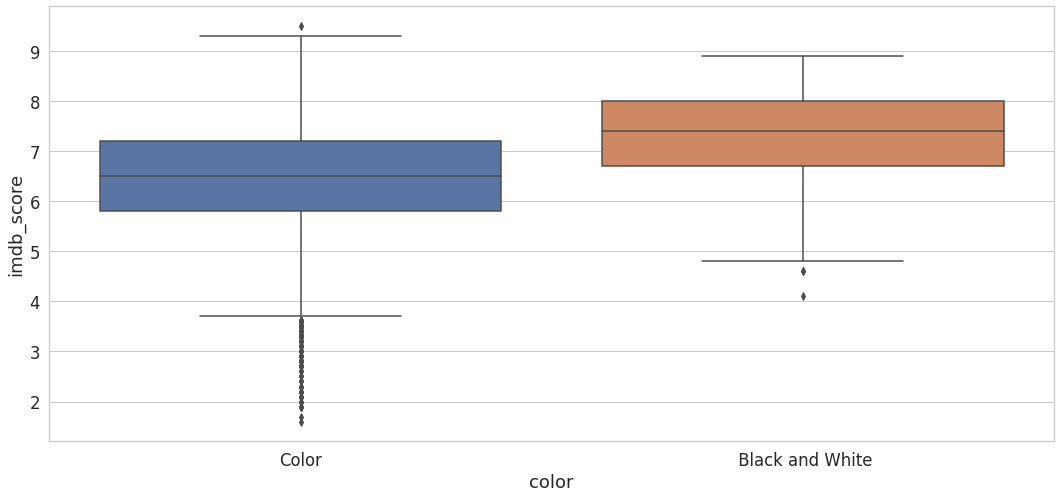

In [131]:
#@title De acordo com o gráfico abaixo, a variância das notas dadas aos filmes coloridos, em relação aos filmes em preto e branco, é considerávelmente maior. Pode ser observado pela distância dos extremos, máximo e mínimo, em relação ao segundo quartil (mediana). A quantidade de outliers também é considerávelmente maior nos filmes coloridos.<br />Pode-se hipotizar que estas diferenças são causadas pela grande quantidade de amostras que o grupo de coloridos tem a mais que os filmes em preto e branco.
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
sns.boxplot(data = df_raw_data, x = df_raw_data['color'], y = df_raw_data['imdb_score'])
plt.show()

### Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


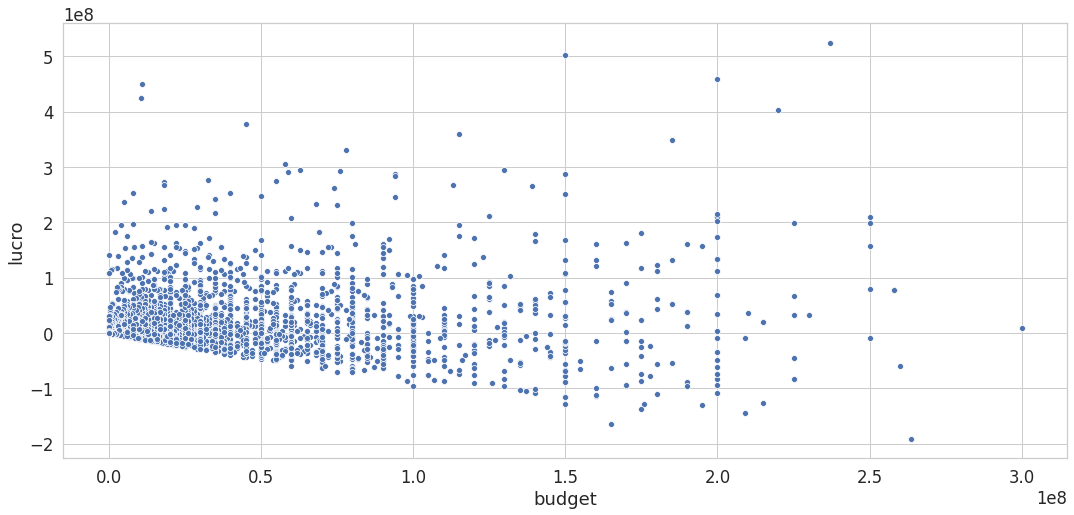

In [132]:
imdb = df_raw_data.copy()
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
plt.figure(figsize=(18,8))
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

In [133]:
imdb_usa.query(f'lucro == {imdb_usa["lucro"].min()}')[['director_name', 'movie_title']]

,director_name,movie_title
5,Andrew Stanton,John Carter


### Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

<Figure size 1296x576 with 0 Axes>

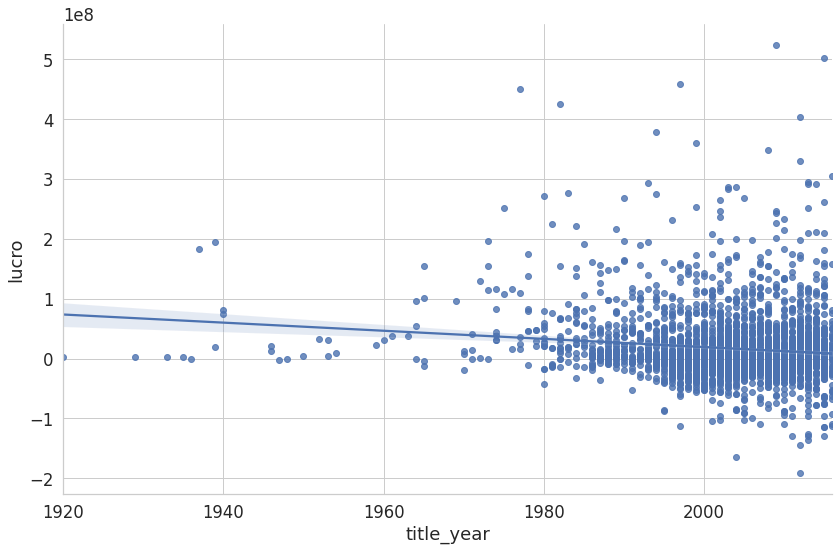

In [134]:
#@title Tendo em vista o gráfico abaixo, pode-se observar uma pequena relação entre a redução do prejuizo, ou, aumento do lucro com o passar do tempo.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
#sns.scatterplot(x="title_year", y="lucro", data = budget_gross)
plt.figure(figsize=(18,8))
g = sns.lmplot(x="title_year", y="lucro", data = budget_gross, aspect=1.5, height=8)
plt.show()

### Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [135]:
#@title Pelos dados contidos no dataset pode-se dizer que todos os indivíduos encontrados com ano anterior à 2ª guerra conseguiram lucrar muito, valor mínimo considerado foi $1.000.000,00 (1e6)
imdb_usa.query(f'lucro > 1e6 & title_year < 1939')[['director_name','movie_title','lucro','title_year']].sort_values('lucro', ascending=False)

,director_name,movie_title,lucro,title_year
4449,William Cottrell,Snow White and the Seven Dwarfs,182925485.0,1937.0
4958,Harry F. Millarde,Over the Hill to the Poorhouse,2900000.0,1920.0
4812,Harry Beaumont,The Broadway Melody,2429000.0,1929.0
4706,Mark Sandrich,Top Hat,2391000.0,1935.0
4786,Lloyd Bacon,42nd Street,1861000.0,1933.0


### Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

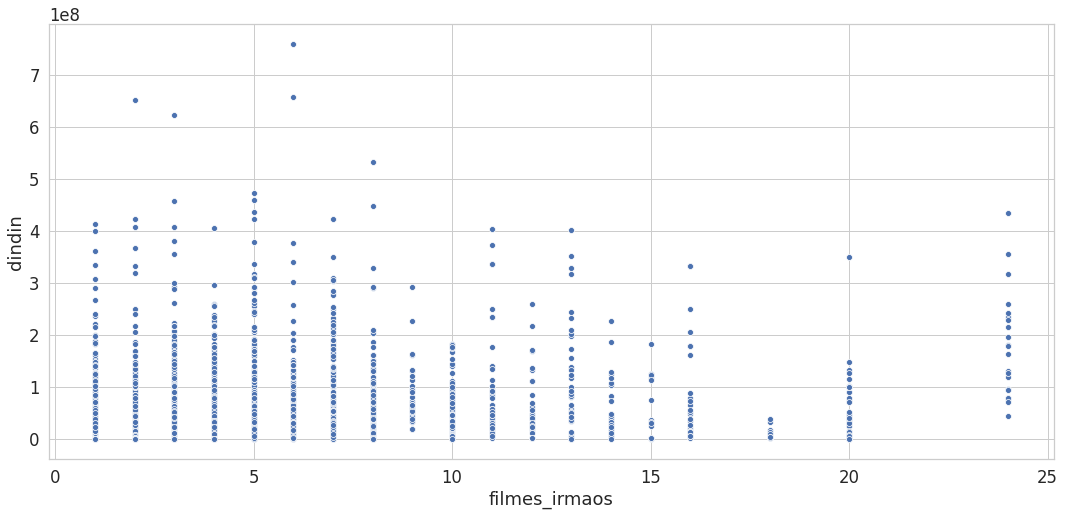

In [136]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
plt.figure(figsize=(18,8))
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [137]:
gross_director.query('filmes_irmaos > 16 & filmes_irmaos < 20').sort_values('dindin', ascending=False)

,director_name,dindin,filmes_irmaos
2932,Woody Allen,39200000.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1737,Woody Allen,16684352.0,18.0
2070,Woody Allen,14792779.0,18.0
1861,Woody Allen,13383737.0,18.0
2166,Woody Allen,10763469.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1538,Woody Allen,7496522.0,18.0


### Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

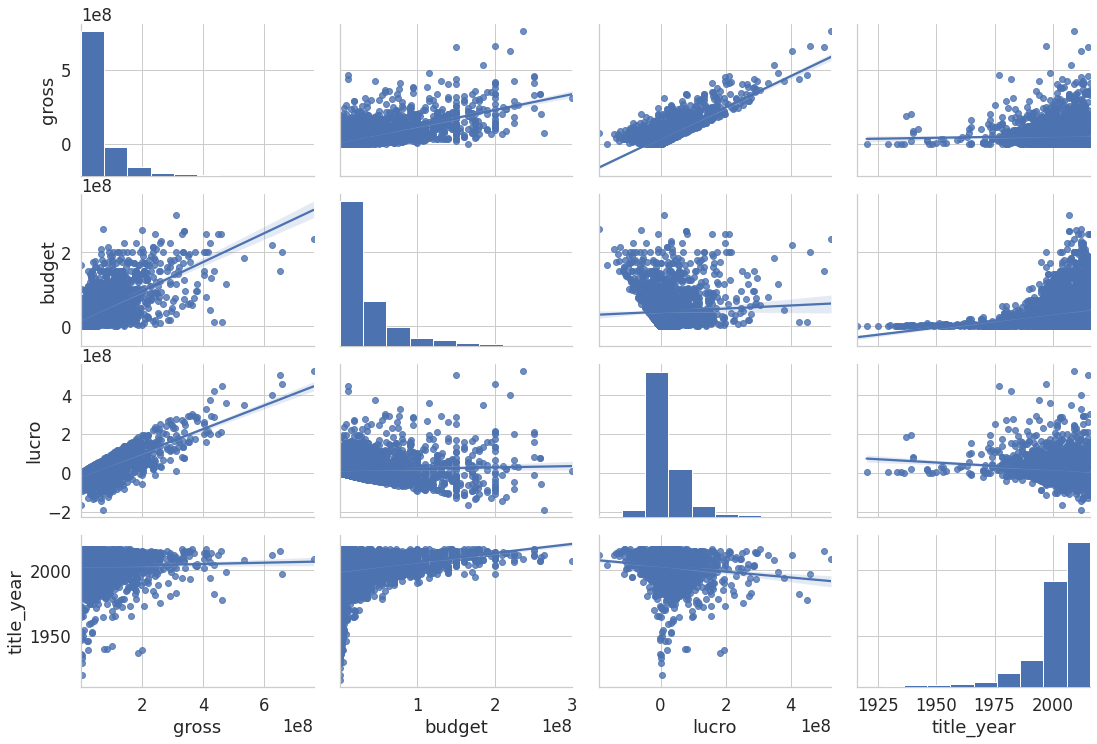

In [138]:
#@title Comparando os géficos abaixo, pode-se dizer que a correlação mais direta é entre o lucro e o gross. Também pode-se observar que os maiores valores de lucro, budget e gross são dos filmes lançados a partir do ano 1990.
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]], kind='reg', aspect=1.5)

### Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [139]:
#@title A correlação é considerável entre <i>gross e lucro, budget e gross, lucro e budget</i>.<br/> Porém não pode-se dizer que são totalmente dependentes entre elas, nem que as alteração de uma são a causa dos valores da outra, ou vise-versa.
imdb_usa.query('title_year >= 2000')[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


In [140]:
imdb_usa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


### Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [141]:
#@title OLS Regression Results (Gross X Lucro)
import statsmodels.api as sm

imdb_reg = imdb_usa.dropna(subset=['lucro','lucro','budget'], inplace=False)
k = imdb_reg['imdb_score']
y = imdb_reg['lucro']
x = imdb_reg['gross']
z = imdb_reg['budget']
X = sm.add_constant(x.values)
results1 = sm.OLS(y,X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lucro   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     5304.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:23:06   Log-Likelihood:                -57102.
No. Observations:                3047   AIC:                         1.142e+05
Df Residuals:                    3045   BIC:                         1.142e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.761e+07    7.7e+05    -22.874      0.000   -1.91e+07   -1.61e+07
x1             0.6095      0.008     72.826      0.000       0.593       0.626
==============================================================================
Omnibus:                      759.490   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3369.176
Skew:                          -1.138   Prob(JB):                         0.00
Kurtosis:                       7.622   Cond. No.                     1.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
#@title OLS Regression Results (Budget X Lucro)
Z = sm.add_constant(z.values)
results2 = sm.OLS(y,Z).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lucro   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.726
Date:                Fri, 24 Apr 2020   Prob (F-statistic):            0.00316
Time:                        00:23:06   Log-Likelihood:                -58634.
No. Observations:                3047   AIC:                         1.173e+05
Df Residuals:                    3045   BIC:                         1.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.449e+07   1.35e+06     10.711      0.000    1.18e+07    1.71e+07
x1             0.0676      0.023      2.954      0.003       0.023       0.112
==============================================================================
Omnibus:                     1764.651   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24775.342
Skew:                           2.474   Prob(JB):                         0.00
Kurtosis:                      16.064   Cond. No.                     8.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
#@title OLS Regression Results (Gross X Score)
results3 = sm.OLS(k,X).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     235.7
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           2.66e-51
Time:                        00:23:06   Log-Likelihood:                -4356.7
No. Observations:                3047   AIC:                             8717.
Df Residuals:                    3045   BIC:                             8729.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1654      0.023    263.873      0.000       6.120       6.211
x1            3.9e-09   2.54e-10     15.354      0.000     3.4e-09     4.4e-09
==============================================================================
Omnibus:                      262.088   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.100
Skew:                          -0.677   Prob(JB):                     1.07e-83
Kurtosis:                       4.083   Cond. No.                     1.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
#@title OLS Regression Results (Budget X Score)
results4 = sm.OLS(k,Z).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     15.17
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           0.000100
Time:                        00:23:06   Log-Likelihood:                -4462.7
No. Observations:                3047   AIC:                             8929.
Df Residuals:                    3045   BIC:                             8942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3205      0.026    245.849      0.000       6.270       6.371
x1          1.694e-09   4.35e-10      3.895      0.000    8.41e-10    2.55e-09
==============================================================================
Omnibus:                      245.698   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.508
Skew:                          -0.646   Prob(JB):                     3.85e-78
Kurtosis:                       4.066   Cond. No.                     8.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

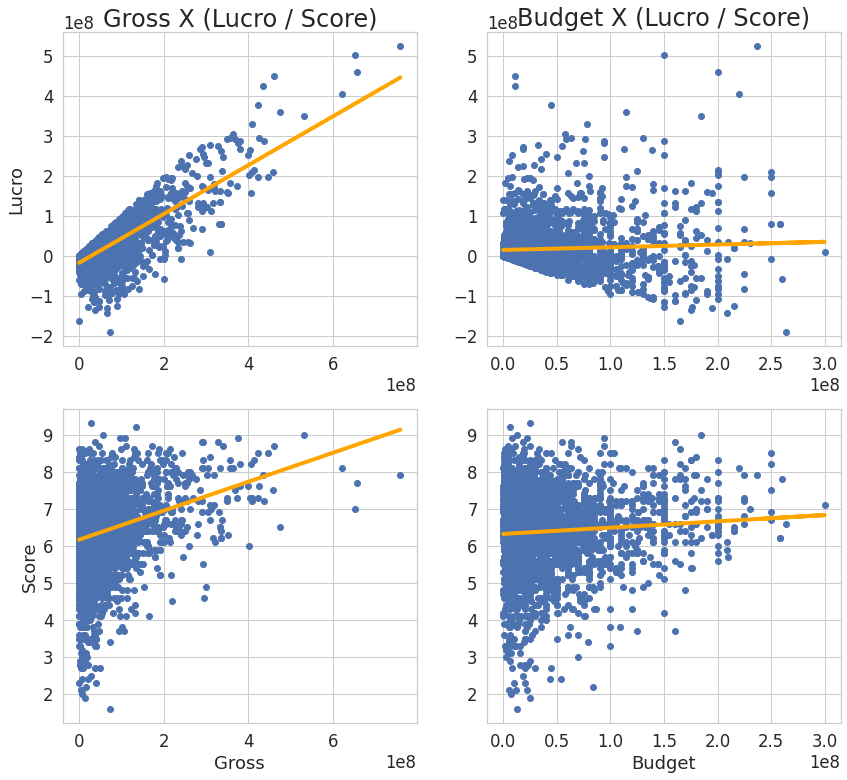

In [145]:
#@title Plota os gráficos de regressões Gross X (Lucro / Score) e Budget X (Lucro / Score).
plt.figure(figsize=(18,6))
plt.subplot(221)
plt.scatter(x,y)
yhat = -1.761e+07 + (0.6095*x)
plt.plot(x,yhat,lw=4, c='orange', label='Regression Line')
plt.ylabel('Lucro', fontsize=18)
plt.title('Gross X (Lucro / Score)', fontsize=24)

plt.subplot(222)
plt.scatter(z,y)
yhat = 1.449e+07+(0.0676*z)
plt.plot(z,yhat,lw=4, c='orange', label='Regression Line')
plt.title('Budget X (Lucro / Score)', fontsize=24)

plt.subplot(223)
plt.scatter(x,k)
yhat = 6.1654 + (3.9e-09*x)
plt.plot(x,yhat,lw=4, c='orange', label='Regression Line')
plt.xlabel('Gross', fontsize=18)
plt.ylabel('Score', fontsize=18)

plt.subplot(224)
plt.scatter(z,k)
yhat = 6.3205+(1.694e-09*z)
plt.plot(z,yhat,lw=4, c='orange', label='Regression Line')
plt.xlabel('Budget', fontsize=18)
plt.subplots_adjust(right=1.5, left=0.9, top=2.5, bottom=0.9)
plt.show()


### Desafio 9 da [Thais André](https://twitter.com/thais_tandre)
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [0]:
corr_var = imdb_usa.groupby('title_year')[['title_year','movie_title','num_voted_users','cast_total_facebook_likes','director_facebook_likes','movie_facebook_likes','actor_1_facebook_likes','lucro', 'gross','budget']].mean()

In [147]:
corr_var[['title_year','num_voted_users','movie_facebook_likes','cast_total_facebook_likes','director_facebook_likes','actor_1_facebook_likes']].corr()

,title_year,num_voted_users,movie_facebook_likes,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes
title_year,1.000000,0.306816,0.365822,0.917002,0.081536,0.894779
num_voted_users,0.306816,1.000000,0.649387,0.300267,0.155462,0.286028
movie_facebook_likes,0.365822,0.649387,1.000000,0.378977,-0.031727,0.334087
cast_total_facebook_likes,0.917002,0.300267,0.378977,1.000000,0.042116,0.990195
director_facebook_likes,0.081536,0.155462,-0.031727,0.042116,1.000000,0.061882
actor_1_facebook_likes,0.894779,0.286028,0.334087,0.990195,0.061882,1.000000


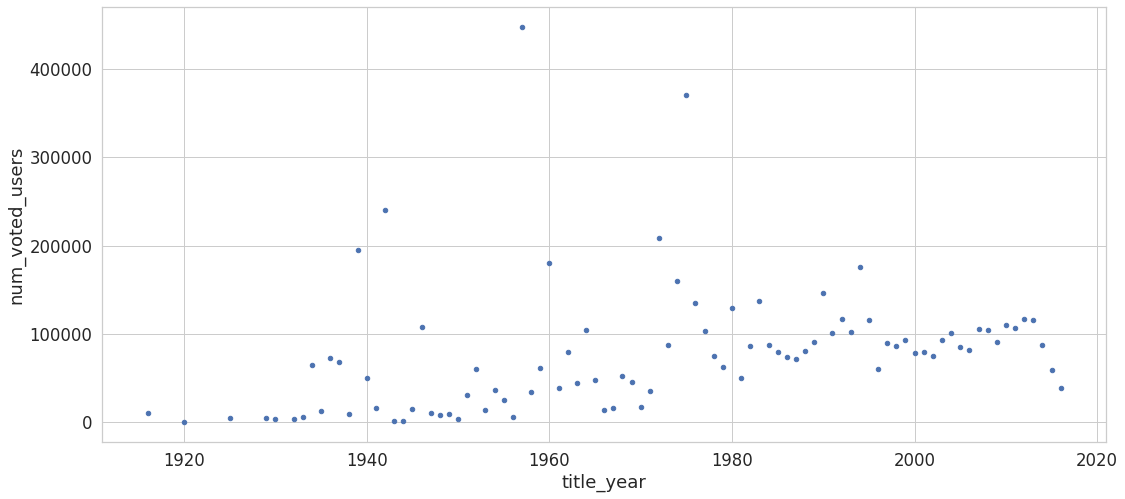

In [148]:
corr_var.plot('title_year', 'num_voted_users', kind='scatter', figsize=(18,8), c='b')
plt.grid(True)
plt.show()

In [0]:
def rotateXticks(g):
  g.fig.draw(
      g.fig.canvas.get_renderer()
  )
  for ax in g.axes.flat: 
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
      ax.set_ylabel(ax.get_ylabel().replace('_',' ').title())
      ax.set_xlabel(ax.get_xlabel().replace('_',' ').title())
      ax.grid(True)

kwargs = {'height':5, 'aspect':1.5, 'kind':'reg'}
sns.set(font_scale=1.5,style="ticks")

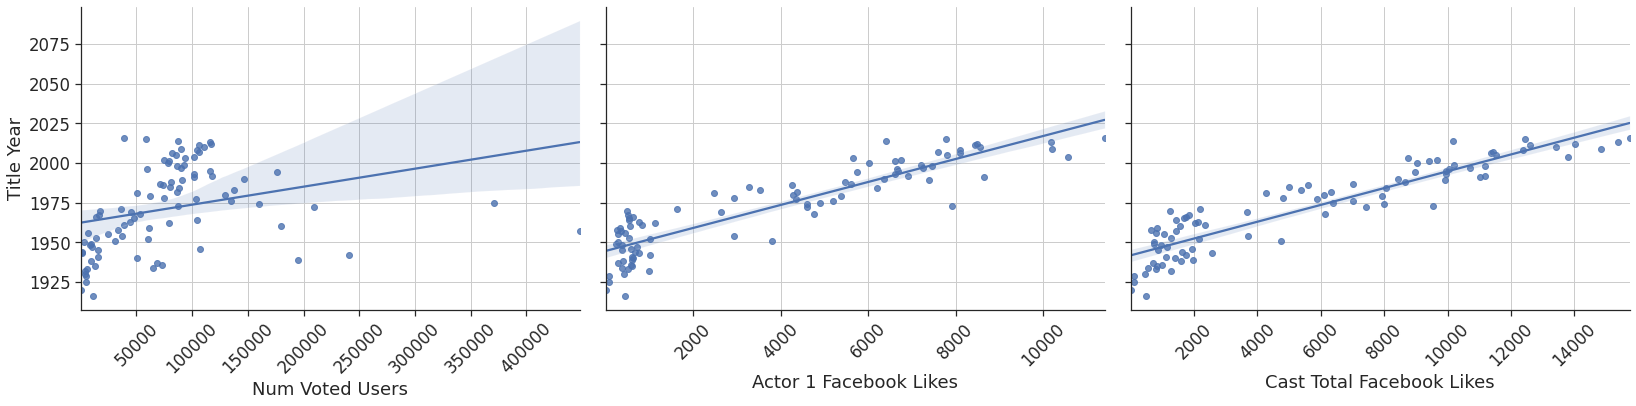

In [150]:
#@title Correlação linear entre o ano do filme e a média anual de votos por usuários IMDB / Facebook Likes do Ator principal / Facebook Likes do Elenco
g = sns.pairplot(corr_var,
             y_vars='title_year',
             x_vars='num_voted_users	actor_1_facebook_likes cast_total_facebook_likes'.split(),
             **kwargs)
rotateXticks(g)
plt.show()


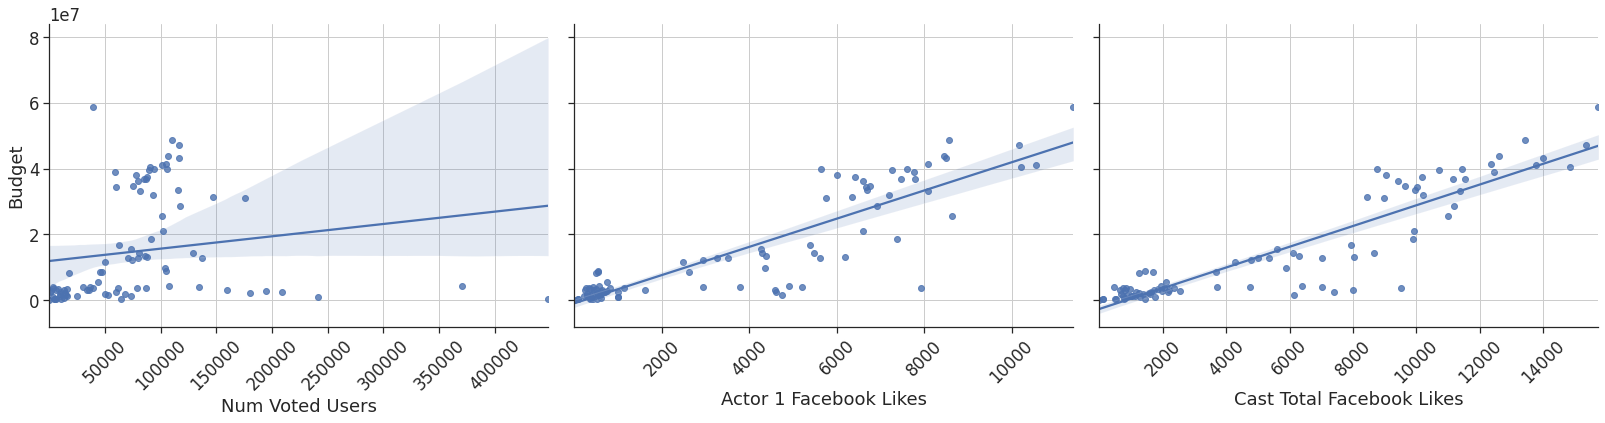

In [151]:
#@title Correlação linear entre o orçamento e a média anual de votos por usuários IMDB / Facebook Likes do Ator principal / Facebook Likes do Elenco
g = sns.pairplot(corr_var,
             y_vars='budget',
             x_vars='num_voted_users	actor_1_facebook_likes	cast_total_facebook_likes'.split(),
             **kwargs)
rotateXticks(g)
plt.show()

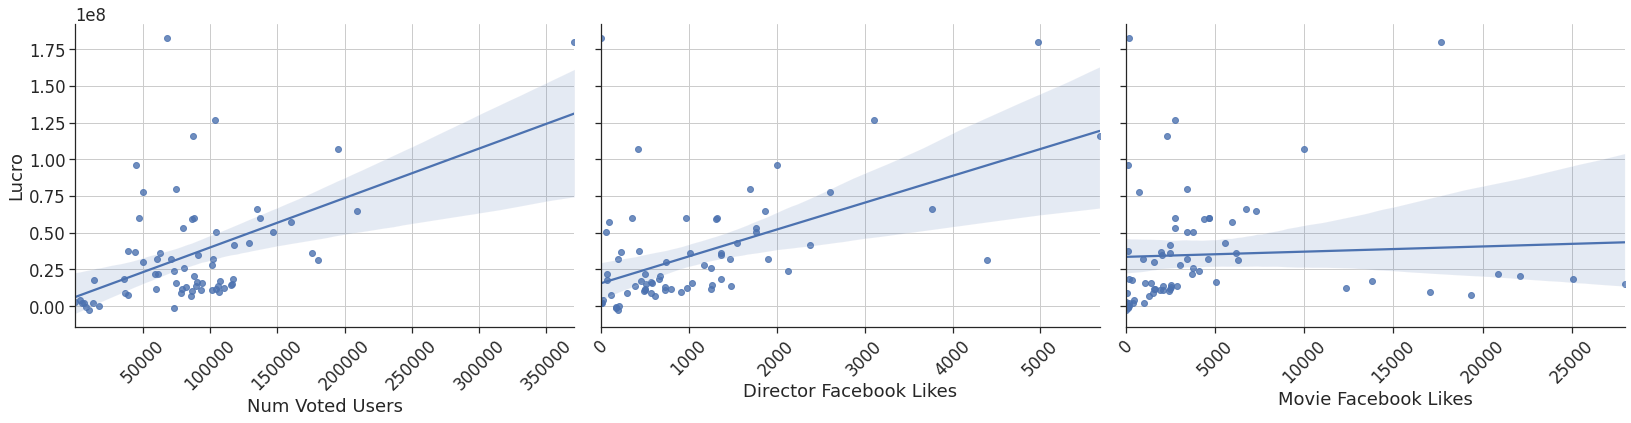

In [152]:
#@title Correlação linear entre o lucro e a média anual de votos por usuários IMDB / Facebook Likes do Diretor / Facebook Likes do Filme
g = sns.pairplot(corr_var,
             y_vars='lucro',
             x_vars='num_voted_users director_facebook_likes	movie_facebook_likes'.split(),
             **kwargs)
rotateXticks(g)
plt.show()

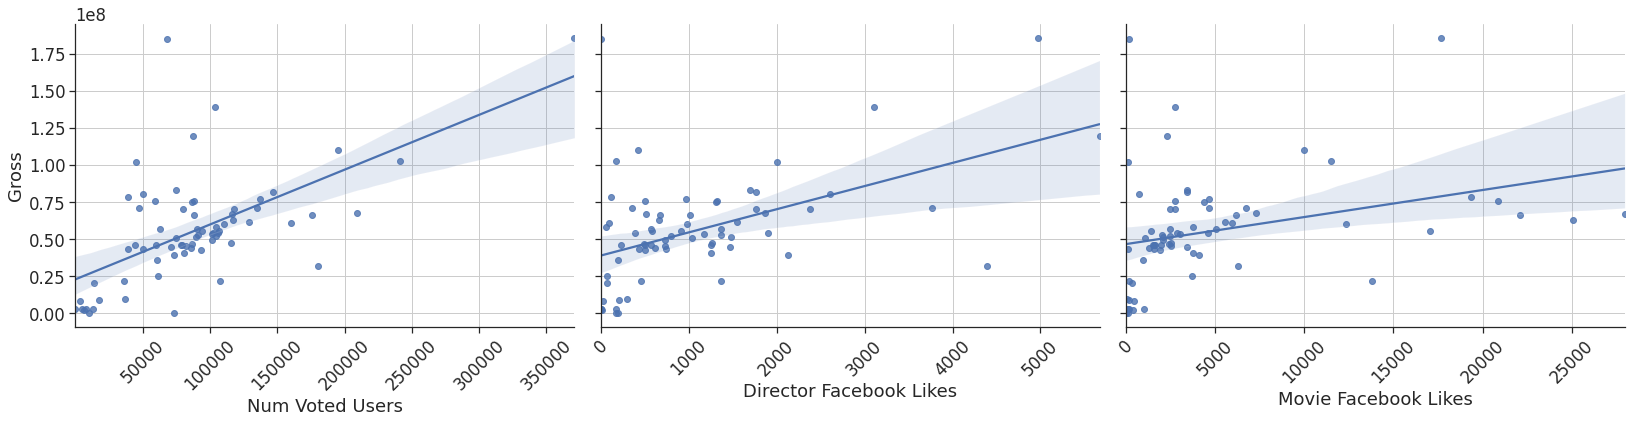

In [153]:
#@title Correlação linear entre a bilheteria e a média anual de votos por usuários IMDB / Facebook Likes do Diretor / Facebook Likes do Filme
g = sns.pairplot(corr_var,
             y_vars='gross',
             x_vars='num_voted_users director_facebook_likes movie_facebook_likes'.split(),
             **kwargs)
rotateXticks(g)
plt.show()

Após realizar a análise exploratória dos dados contidos no Dataset e testar várias possibilidades de correlações entre as variáveis quantitativas e qualificativas, pode-se observar a relação direta entre bilheteria e o lucro.

In [154]:
#@title A lista com as maiores bilheterias e consequentimente maiores lucros da amostra, sem considerar ajustes de inflação.
imdb_usa.query('gross > 5e8')[['movie_title','director_name','gross','budget', 'lucro']].sort_values('lucro', ascending=False)

,movie_title,director_name,gross,budget,lucro
0,Avatar,James Cameron,760505847.0,237000000.0,523505847.0
29,Jurassic World,Colin Trevorrow,652177271.0,150000000.0,502177271.0
26,Titanic,James Cameron,658672302.0,200000000.0,458672302.0
17,The Avengers,Joss Whedon,623279547.0,220000000.0,403279547.0
66,The Dark Knight,Christopher Nolan,533316061.0,185000000.0,348316061.0


Também é notável a relação entre a popularidade(Facebook Likes) do diretor com a bilheteria e consequentimente com o lucro obtido.

In [155]:
#@title Apesar de estar em 5º no rank de maiores bilheterias, Christopher Nolan é o 1º em bilheteria acumulada.
imdb_usa.query('director_facebook_likes > 1.5e4 & gross > 2e8')[['movie_title','director_name','director_facebook_likes','budget','gross', 'lucro']].sort_values('lucro', ascending=False)

,movie_title,director_name,director_facebook_likes,budget,gross,lucro
66,The Dark Knight,Christopher Nolan,22000.0,185000000.0,533316061.0,348316061.0
814,American Sniper,Clint Eastwood,16000.0,58800000.0,350123553.0,291323553.0
3,The Dark Knight Rises,Christopher Nolan,22000.0,250000000.0,448130642.0,198130642.0
97,Inception,Christopher Nolan,22000.0,160000000.0,292568851.0,132568851.0
120,Batman Begins,Christopher Nolan,22000.0,150000000.0,205343774.0,55343774.0


Também pode-se observar há uma pequena relação entre o orçamento e a popularidade(Facebook Likes) do ator principal e do elenco.

In [156]:
#@title Apesar de Harrison Ford e Leonardo DiCaprio serem bem conhecidos, os 2 maiores orçamentos foram de filmes protagonizados por Chris Hemsworth e dirigidos por Joss Whedon.<br />Tabela ordenada pela orçamento 'budget'
imdb_usa.query('actor_1_facebook_likes > 1e4 & gross > 4.5e8')[['movie_title','director_name','actor_1_name','actor_1_facebook_likes','budget','gross', 'lucro']].sort_values('budget', ascending=False)

,movie_title,director_name,actor_1_name,actor_1_facebook_likes,budget,gross,lucro
8,Avengers: Age of Ultron,Joss Whedon,Chris Hemsworth,26000.0,250000000.0,458991599.0,208991599.0
17,The Avengers,Joss Whedon,Chris Hemsworth,26000.0,220000000.0,623279547.0,403279547.0
26,Titanic,James Cameron,Leonardo DiCaprio,29000.0,200000000.0,658672302.0,458672302.0
66,The Dark Knight,Christopher Nolan,Christian Bale,23000.0,185000000.0,533316061.0,348316061.0
240,Star Wars: Episode I - The Phantom Menace,George Lucas,Natalie Portman,20000.0,115000000.0,474544677.0,359544677.0
3024,Star Wars: Episode IV - A New Hope,George Lucas,Harrison Ford,11000.0,11000000.0,460935665.0,449935665.0


In [157]:
#@title Os elencos mais populares(Facebook Likes) confirmam as maiores bilheterias e orçamentos de Christopher Nolan e Joss Whedon.<br/>Tabela ordenada pela orçamento 'budget'
imdb_usa.query('cast_total_facebook_likes > 5e4 & gross > 3.5e8')[['movie_title','director_name','actor_1_name','cast_total_facebook_likes','budget','gross', 'lucro']].sort_values('budget', ascending=False)

,movie_title,director_name,actor_1_name,cast_total_facebook_likes,budget,gross,lucro
3,The Dark Knight Rises,Christopher Nolan,Tom Hardy,106759,250000000.0,448130642.0,198130642.0
8,Avengers: Age of Ultron,Joss Whedon,Chris Hemsworth,92000,250000000.0,458991599.0,208991599.0
27,Captain America: Civil War,Anthony Russo,Robert Downey Jr.,64798,250000000.0,407197282.0,157197282.0
17,The Avengers,Joss Whedon,Chris Hemsworth,87697,220000000.0,623279547.0,403279547.0
45,Furious 7,James Wan,Jason Statham,79150,190000000.0,350034110.0,160034110.0
66,The Dark Knight,Christopher Nolan,Christian Bale,57802,185000000.0,533316061.0,348316061.0


In [158]:
#@title Sendo uma pequena relação entre a popularidade(Facebook Likes) do ator principal, pode-se identificar vários outliers que apesar de terem as maiores quantidades de Likes no Facebook, as bilheterias e orçamentos dos filmes não são tão bons.<br /> Tabela ordenada pela quantidade de Facebook Like do ator principal.
imdb_usa.query('actor_1_facebook_likes > 1e5')[['movie_title','director_name','actor_1_name','actor_1_facebook_likes','gross', 'budget', 'lucro']].sort_values('actor_1_facebook_likes', ascending=False)

,movie_title,director_name,actor_1_name,actor_1_facebook_likes,gross,budget,lucro
1902,Anchorman: The Legend of Ron Burgundy,Adam McKay,Darcy Donavan,640000.0,84136909.0,26000000.0,58136909.0
4409,Kickboxer: Vengeance,John Stockwell,Matthew Ziff,260000.0,NaN,17000000.0,NaN
4592,Hardflip,Johnny Remo,Matthew Ziff,260000.0,96734.0,1000000.0,-903266.0
4704,Treachery,Travis Romero,Matthew Ziff,260000.0,NaN,625000.0,NaN
1223,The Final Destination,David R. Ellis,Krista Allen,164000.0,66466372.0,40000000.0,26466372.0
4045,Feast,John Gulager,Krista Allen,164000.0,NaN,3200000.0,NaN
2269,Armored,Nimród Antal,Andrew Fiscella,137000.0,15988876.0,27000000.0,-11011124.0
2939,Quarantine,John Erick Dowdle,Andrew Fiscella,137000.0,31691811.0,12000000.0,19691811.0


In [159]:
#@title Sendo uma pequena relação entre a popularidade(Facebook Likes) do ator elenco, pode-se identificar vários outliers que apesar de terem as maiores quantidades de Likes no Facebook, as bilheterias e orçamentos dos filmes não são tão bons.<br /> Tabela ordenada pela quantidade de Facebook Likes total do elenco principal.
imdb_usa.query('cast_total_facebook_likes > 2e5')[['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','cast_total_facebook_likes','gross', 'budget', 'lucro']].sort_values('cast_total_facebook_likes', ascending=False)

,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,gross,budget,lucro
1902,Anchorman: The Legend of Ron Burgundy,Adam McKay,Darcy Donavan,Will Ferrell,Steve Carell,656730,84136909.0,26000000.0,58136909.0
1223,The Final Destination,David R. Ellis,Krista Allen,Andrew Fiscella,Shantel VanSanten,303717,66466372.0,40000000.0,26466372.0
4704,Treachery,Travis Romero,Matthew Ziff,Lorraine Ziff,Michael Biehn,283939,NaN,625000.0,NaN
4592,Hardflip,Johnny Remo,Matthew Ziff,Randy Wayne,Raquel Elizabeth Ames,263584,96734.0,1000000.0,-903266.0
4409,Kickboxer: Vengeance,John Stockwell,Matthew Ziff,T.J. Storm,Sam Medina,261818,NaN,17000000.0,NaN
